# Load & Clean Data

---

In [1]:
import pandas as pd
import numpy as np


---
## Load Data
---

### 1. Import .csv source files into Pandas dataframes.

In [199]:
# Import Products.csv and create products_df
products_df = pd.read_csv('Products.csv')

# Import Shipping.csv and create shipping_df
shipping_df = pd.read_csv('Shipping.csv')

# Import Stores.csv and create stores_df1
stores_df1 = pd.read_csv('Stores.csv')

# Import Transactions.csv and create transactions_df
transactions_df = pd.read_csv('Transactions.csv')

### 2. Check for null values in the four dataframes.

In [200]:
# Create files list containing the four dataframes
files = [products_df, shipping_df, stores_df1, transactions_df]

# Loop through the files list and print the sum of null values
for i in files:
    print(i.isnull().sum())

ProductID    0
Name         0
Price        0
Cost         0
dtype: int64
OrderID           0
City              0
ShippingMethod    9
dtype: int64
StoreID    10
City        0
dtype: int64
ProductID    0
Year         0
Month        0
Day          0
Quantity     0
OrderLine    0
OrderID      0
dtype: int64


### 3. Fill in the null values of the StoreID column.

In [203]:
# Create a list of sequential numbers from 1 to 10
storeIDs = list(range(1,11))

# Create a for loop that assigns each of the items from the list to the StoreID column of stores_df1
#for i in stores_df1['StoreID'].index:
 #   stores_df1['StoreID'][i] = storeIDs[i]
for i in stores_df1.index:
    stores_df1.loc[i, 'StoreID'] = storeIDs[i % len(storeIDs)]

In [204]:
# Print stores_df1 to check the results of the for loop
stores_df1

,StoreID,City
0,1.0,Surrey
1,2.0,Langley
2,3.0,Vancouver
3,4.0,Burnaby
4,5.0,Los Angeles
5,6.0,New York
6,7.0,Portland
7,8.0,Utah
8,9.0,Seattle
9,10.0,Kelowna


### 4. Fill in the null values of the ShippingMethod column with 'Expediated'.

In [205]:
# Identify the unique values and count of rows in the ShippingMethod column
shipping_df['ShippingMethod'].value_counts(dropna = False)

ShippingMethod
Standard     535
Expedited     55
Nextday       55
NaN            9
Name: count, dtype: int64

In [206]:
# Fill the na values with 'Expediated'
shipping_df['ShippingMethod']=shipping_df['ShippingMethod'].fillna('Expedited')

In [207]:
# Check the unique values and counts
shipping_df['ShippingMethod'].value_counts(dropna = False)

ShippingMethod
Standard     535
Expedited     64
Nextday       55
Name: count, dtype: int64

---
## Clean Data
---

### 5. Create stores_df2 dataframe from a dictionary containing two lists.

In [208]:
# Create and print storeIDs and cities lists
storeIDs2 = list(range(11,16))
cities = ['Seoul','Tokyo','Denver','Miami','San Diego']

print(storeIDs2)
print(cities)

[11, 12, 13, 14, 15]
['Seoul', 'Tokyo', 'Denver', 'Miami', 'San Diego']


In [209]:
# Create and print stores_dict dictionary with the storeIDs and cities lists
stores_dict = {'StoreID': storeIDs2,
         'City': cities}
stores_dict

{'StoreID': [11, 12, 13, 14, 15],
 'City': ['Seoul', 'Tokyo', 'Denver', 'Miami', 'San Diego']}

In [210]:
# Create and print stores_df2 dataframe from the stores_dict dictionary
stores_df2 = pd.DataFrame(data=stores_dict)
stores_df2

,StoreID,City
0,11,Seoul
1,12,Tokyo
2,13,Denver
3,14,Miami
4,15,San Diego


### 6. Concatenate stores_df1 and stores_df2 to create store_df.

In [211]:
# Create stores_df by concatenating the stores_df1 and stores_df2 dataframes
stores_df = pd.concat([stores_df1, stores_df2]).reset_index().drop('index', axis = 1)

In [212]:
# Print stores_df to check the results of the concatenation
stores_df

,StoreID,City
0,1.0,Surrey
1,2.0,Langley
2,3.0,Vancouver
3,4.0,Burnaby
4,5.0,Los Angeles
5,6.0,New York
6,7.0,Portland
7,8.0,Utah
8,9.0,Seattle
9,10.0,Kelowna


### 7. Identify and drop duplicate rows from transactions_df.

In [213]:
# Identify duplicate rows in transactions_df
transactions_df[transactions_df.duplicated()]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID
122,20,2019,11,7,4,122,122
123,20,2019,11,7,4,122,122
124,20,2019,11,7,4,122,122
125,20,2019,11,7,4,122,122
126,20,2019,11,7,4,122,122
127,20,2019,11,7,4,122,122
128,20,2019,11,7,4,122,122


In [214]:
# Drop duplicate rows in transactions_df
transactions_df = transactions_df.drop_duplicates()

In [215]:
# Print transactions_df to check the results of dropping duplicates
transactions_df[transactions_df.duplicated()]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID


### 8. Modify the column data types in shipping_df & transactions_df.

In [218]:
# Identify the data types in shipping_df & transactions_df
shipping_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         654 non-null    float64
 1   City            654 non-null    object 
 2   ShippingMethod  654 non-null    object 
dtypes: float64(1), object(2)
memory usage: 15.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, 0 to 660
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ProductID  654 non-null    int64
 1   Year       654 non-null    int64
 2   Month      654 non-null    int64
 3   Day        654 non-null    int64
 4   Quantity   654 non-null    int64
 5   OrderLine  654 non-null    int64
 6   OrderID    654 non-null    int64
dtypes: int64(7)
memory usage: 40.9 KB


In [219]:
# Change the data type of OrderID to integer
shipping_df['OrderID'] = shipping_df['OrderID'].astype('int')

In [221]:
# Change the data type of Year, Month, and Day to string
transactions_df.loc[:, 'Year'] = transactions_df['Year'].astype('str')
transactions_df.loc[:, 'Month'] = transactions_df['Month'].astype('str')
transactions_df.loc[:, 'Day'] = transactions_df['Day'].astype('str')

In [222]:
# Print shipping_df & transactions_df to check the results of the change in data type
shipping_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderID         654 non-null    int64 
 1   City            654 non-null    object
 2   ShippingMethod  654 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, 0 to 660
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductID  654 non-null    int64 
 1   Year       654 non-null    object
 2   Month      654 non-null    object
 3   Day        654 non-null    object
 4   Quantity   654 non-null    int64 
 5   OrderLine  654 non-null    int64 
 6   OrderID    654 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 40.9+ KB


### 9. Split the Name column into two columns: Type and Colour.

In [223]:
# View the top 5 rows of products_df
products_df.head()

,ProductID,Name,Price,Cost
0,1,"Sweater,Blue",30,10
1,2,"Sweater,Black",35,10
2,3,"Sweater,White",30,10
3,4,"Hoodie,Black",40,15
4,5,"Hoodie,White",35,15


In [224]:
# Create Type and Colour columns by splitting the Name column
products_df['Type'] = products_df['Name'].str.split(',', expand=True)[0]
products_df['Colour'] = products_df['Name'].str.split(',', expand=True)[1]

In [225]:
# Print the top 5 rows of products_df to check the new columns
products_df.head()

,ProductID,Name,Price,Cost,Type,Colour
0,1,"Sweater,Blue",30,10,Sweater,Blue
1,2,"Sweater,Black",35,10,Sweater,Black
2,3,"Sweater,White",30,10,Sweater,White
3,4,"Hoodie,Black",40,15,Hoodie,Black
4,5,"Hoodie,White",35,15,Hoodie,White


### 10. Replace the 'Gray' values of the Colour column with 'Grey'.

In [226]:
# Identify the unique values of Colour
products_df['Colour'].unique()

array(['Blue', 'Black', 'White', 'Gray', 'Grey', 'Green', 'Red'],
      dtype=object)

In [227]:
# Replace the values of 'Gray' with 'Grey'
products_df['Colour'] = products_df['Colour'].str.replace('Gray','Grey')

In [228]:
# Review the new unique values of Colour
products_df['Colour'].unique()

array(['Blue', 'Black', 'White', 'Grey', 'Green', 'Red'], dtype=object)

---
## Transform Data
---

### 11. Create orders_df by merging transactions_df, products_df, shipping_df, and stores_df.

In [229]:
# Merge transactions_df & products_df - returning all matching rows to the transactions_df
orders_df = pd.merge(transactions_df, products_df, on = 'ProductID', how = 'left')

# Merge shipping_df & stores_df - returning only matching rows in both dataframes
shipping_stores_df = pd.merge(shipping_df, stores_df, on = 'City', how = 'inner')

# Merge orders_df & shipping_stores_df - returning only matching rows from the shipping_stores_df
orders_df = pd.merge(orders_df, shipping_stores_df, on = 'OrderID', how = 'right')

In [230]:
# Print orders_df to inspect the new dataframe
orders_df

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,Type,Colour,City,ShippingMethod,StoreID
0,3,2019,1,2,2,1,1,"Sweater,White",30,10,Sweater,White,Vancouver,Standard,3.0
1,8,2019,1,6,3,2,2,"T-shirt,Black",20,2,T-shirt,Black,Los Angeles,Expedited,5.0
2,1,2019,1,6,1,3,3,"Sweater,Blue",30,10,Sweater,Blue,Burnaby,Standard,4.0
3,8,2019,1,9,4,4,4,"T-shirt,Black",20,2,T-shirt,Black,Vancouver,Standard,3.0
4,1,2019,1,12,2,5,5,"Sweater,Blue",30,10,Sweater,Blue,Los Angeles,Standard,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,13,2022,7,9,1,650,650,"Socks,Grey",10,1,Socks,Grey,Langley,Standard,2.0
599,5,2022,7,31,3,651,651,"Hoodie,White",35,15,Hoodie,White,Langley,Standard,2.0
600,7,2022,9,3,1,652,652,"T-shirt,White",15,2,T-shirt,White,Langley,Standard,2.0
601,7,2022,10,29,2,653,653,"T-shirt,White",15,2,T-shirt,White,Langley,Standard,2.0


### 12. Create a new column, Date, from the Year, Month, and Day columns in orders_df.

In [231]:
# Create Date column
orders_df['Date'] = orders_df['Year'] +"-"+ orders_df['Month'] +"-"+ orders_df['Day']

# Set the data type to 'datetime64[ns]'
orders_df['Date'] = orders_df['Date'].astype('datetime64[ns]')

In [232]:
# Inspect orders_df to check the new column
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ProductID       603 non-null    int64         
 1   Year            603 non-null    object        
 2   Month           603 non-null    object        
 3   Day             603 non-null    object        
 4   Quantity        603 non-null    int64         
 5   OrderLine       603 non-null    int64         
 6   OrderID         603 non-null    int64         
 7   Name            603 non-null    object        
 8   Price           603 non-null    int64         
 9   Cost            603 non-null    int64         
 10  Type            603 non-null    object        
 11  Colour          603 non-null    object        
 12  City            603 non-null    object        
 13  ShippingMethod  603 non-null    object        
 14  StoreID         603 non-null    float64       
 15  Date  

### 13. Create a new column, Discount Pct, in orders_df. The column should indicate a 30% discount to socks that are either green or grey.

In [233]:
# Create Discount Pct column
orders_df['Discount Pct'] = np.where(
    (
        (orders_df['Type'] == 'Socks') & 
        ((orders_df['Colour'] == 'Green') | (orders_df['Colour'] == 'Grey'))
    )
    , 30, 0)

In [234]:
# Print orders_df where the rows have a Type of 'Socks'
orders_df[(orders_df['Type'] == 'Socks')]

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,Type,Colour,City,ShippingMethod,StoreID,Date,Discount Pct
8,14,2019,1,28,5,9,9,"Socks,Green",10,1,Socks,Green,Burnaby,Standard,4.0,2019-01-28,30
10,11,2019,1,31,3,11,11,"Socks,White",10,1,Socks,White,New York,Standard,6.0,2019-01-31,0
18,11,2019,2,12,1,19,19,"Socks,White",10,1,Socks,White,Burnaby,Standard,4.0,2019-02-12,0
25,13,2019,2,27,2,26,26,"Socks,Grey",10,1,Socks,Grey,Langley,Standard,2.0,2019-02-27,30
62,13,2019,5,26,4,63,63,"Socks,Grey",10,1,Socks,Grey,Seoul,Standard,11.0,2019-05-26,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,13,2021,2,7,5,617,617,"Socks,Grey",10,1,Socks,Grey,Langley,Standard,2.0,2021-02-07,30
568,14,2021,3,6,3,620,620,"Socks,Green",10,1,Socks,Green,Langley,Standard,2.0,2021-03-06,30
572,12,2021,4,21,2,624,624,"Socks,Black",15,1,Socks,Black,Langley,Standard,2.0,2021-04-21,0
587,14,2021,10,17,5,639,639,"Socks,Green",10,1,Socks,Green,Langley,Standard,2.0,2021-10-17,30


### 14. Create five new columns in orders_df.

In [235]:
# Create Sale Price, calculating the price after a discount has been applied
orders_df['Sale Price'] = orders_df['Price']*(100-orders_df['Discount Pct'])/100

In [236]:
# Create Net Profit, calculating the difference between the Sale Price and Cost
orders_df['Net Profit'] = orders_df['Sale Price']-orders_df['Cost']

In [237]:
# Create Total Revenue, calculating the Sale Price by Quantity
orders_df['Total Revenue'] = orders_df['Sale Price']*orders_df['Quantity']

In [238]:
# Create Total Cost, calculating the Cost by Quantity
orders_df['Total Cost'] = orders_df['Cost']*orders_df['Quantity']

In [239]:
# Create Total Net Profit, calculating the difference between Total Revenue and Total Cost
orders_df['Total Net Profit'] = orders_df['Total Revenue']-orders_df['Total Cost']

In [240]:
# Print orders_df to check the new columns
orders_df.head()

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
0,3,2019,1,2,2,1,1,"Sweater,White",30,10,...,Vancouver,Standard,3.0,2019-01-02,0,30.0,20.0,60.0,20,40.0
1,8,2019,1,6,3,2,2,"T-shirt,Black",20,2,...,Los Angeles,Expedited,5.0,2019-01-06,0,20.0,18.0,60.0,6,54.0
2,1,2019,1,6,1,3,3,"Sweater,Blue",30,10,...,Burnaby,Standard,4.0,2019-01-06,0,30.0,20.0,30.0,10,20.0
3,8,2019,1,9,4,4,4,"T-shirt,Black",20,2,...,Vancouver,Standard,3.0,2019-01-09,0,20.0,18.0,80.0,8,72.0
4,1,2019,1,12,2,5,5,"Sweater,Blue",30,10,...,Los Angeles,Standard,5.0,2019-01-12,0,30.0,20.0,60.0,20,40.0


# Analyze & Visualize Data
---

---
## Analyze Data
---

## Store Metrics

### 1. Filter orders_df to return rows from 2019 for Store 1.

In [241]:
# Define the filter condition on the Year and StoreID columns
store1_2019_orders = orders_df[(orders_df['Year'] == '2019') & (orders_df['StoreID'] == 1)]

# Apply the filter condition to orders_df
print(store1_2019_orders)

     ProductID  Year Month Day  Quantity  OrderLine  OrderID           Name  \
5           10  2019     1  12         4          5        6   T-shirt,Blue   
14           9  2019     2   8         4         15       15   T-shirt,Grey   
17           7  2019     2  12         1         18       18  T-shirt,White   
21           8  2019     2  18         3         22       22  T-shirt,Black   
30           4  2019     3  16         3         31       31   Hoodie,Black   
33           8  2019     3  27         4         34       34  T-shirt,Black   
36           9  2019     4   2         2         37       37   T-shirt,Grey   
37           6  2019     4   2         1         37       38    Hoodie,Gray   
39           1  2019     4   9         4         40       40   Sweater,Blue   
47           8  2019     4  17         3         48       48  T-shirt,Black   
59           9  2019     5  15         3         60       60   T-shirt,Grey   
61           2  2019     5  23         3         62 

### 2. What is the average Total Net Profit across the stores?

In [242]:
# Calculate the Total Net Profit by StoreID
net_profit_by_StoreID = orders_df.groupby('StoreID')['Total Net Profit'].sum().reset_index()

# Calculate the average Total Net Profit
net_profit_by_StoreID['Total Net Profit'].mean()

np.float64(2709.0833333333335)

### 3. Return the number of orders for each Store and City.

In [243]:
#orders_by_store_city = orders_df.groupby(['StoreID', 'City'])['OrderID'].nunique().reset_index()
#orders_by_store_city

orders_df[['StoreID','City','OrderID']].groupby(by=['StoreID','City']).count()

,,OrderID
StoreID,City,
1.0,Surrey,130
2.0,Langley,73
3.0,Vancouver,165
4.0,Burnaby,139
5.0,Los Angeles,16
6.0,New York,14
7.0,Portland,15
9.0,Seattle,12
10.0,Kelowna,10


### 4. Return the Total Cost by Store in descending order.

In [244]:
# Calculate the Total Cost by StoreID

Total_cost_by_StoreID = orders_df[['StoreID', 'Total Cost']].groupby(by=['StoreID']).sum()

Total_cost_by_StoreID.sort_values('Total Cost', ascending=False)

#Total_cost_by_StoreID


,Total Cost
StoreID,
3.0,3365
4.0,3314
1.0,2779
2.0,1677
6.0,425
10.0,388
5.0,275
7.0,272
12.0,248


### 5. Return the Total Revenue in the Year 2019 for each StoreID.

In [245]:
# Filter Year to 2019
orders_df_2019 = orders_df[(orders_df['Year'] == '2019')]
# Return Total Revenue by StoreID and City
revenue_2019_by_store_city = orders_df_2019.groupby(['StoreID', 'City'])['Total Revenue'].sum().reset_index()
revenue_2019_by_store_city



,StoreID,City,Total Revenue
0,1.0,Surrey,2383.0
1,2.0,Langley,1440.0
2,3.0,Vancouver,2960.0
3,4.0,Burnaby,2965.0
4,5.0,Los Angeles,319.0
5,6.0,New York,395.0
6,7.0,Portland,355.0
7,9.0,Seattle,502.0
8,10.0,Kelowna,505.0
9,11.0,Seoul,88.0


### 6.  Return the StoreID and City with the highest and lowest Total Revenue.

In [246]:
# Calculate Total Revenue for each StoreID and City
Total_Revenue_StoreID_City = orders_df.groupby(['StoreID', 'City'])['Total Revenue'].sum().reset_index()

# Calculate the maximum and minimum Total Revenue
max_Total_Revenue = Total_Revenue_StoreID_City['Total Revenue'].max()
min_Total_Revenue = Total_Revenue_StoreID_City['Total Revenue'].min()

store_with_max_revenue = Total_Revenue_StoreID_City[Total_Revenue_StoreID_City['Total Revenue'] == max_Total_Revenue]
store_with_min_revenue = Total_Revenue_StoreID_City[Total_Revenue_StoreID_City['Total Revenue'] == min_Total_Revenue]

# Return the StoreID and City with the maximum or minimum Total Revenue
print("Store with Max Total Revenue:\n", store_with_max_revenue)
print("\nStore with Min Total Revenue:\n", store_with_min_revenue)

Store with Max Total Revenue:
    StoreID       City  Total Revenue
2      3.0  Vancouver        12105.0

Store with Min Total Revenue:
    StoreID   City  Total Revenue
9     11.0  Seoul          244.0


## Product Metrics

### 7. How many Black T-shirts were sold?

In [247]:
#BlackT_shirt = orders_df[(orders_df['ProductID'] == 8)]

#BlackT_shirt = BlackT_shirt[['Name', 'Total Revenue']].groupby(by=['Total Revenue']).sum()
#BlackT_shirt 

black_tshirt_sales = orders_df[orders_df['ProductID'] == 8]['Quantity'].sum()
print(f"Total Black T-shirts sold: {black_tshirt_sales}")

Total Black T-shirts sold: 286


### 8. Which product has the highest Total Revenue to Total Cost Ratio?

In [248]:
# Calculate Total Revenue and Total Cost by ProductID
total_revenue_cost = orders_df[['ProductID','Total Revenue','Total Cost']].groupby(by='ProductID').sum()
total_revenue_cost

# Calculate the Revenue Cost Ratio
total_revenue_cost['Revenue Cost Ratio'] = total_revenue_cost['Total Revenue'] / total_revenue_cost['Total Cost']
total_revenue_cost
# Calculate the maximum Revenue Cost Ratio
max_ratio = total_revenue_cost['Revenue Cost Ratio'].max()

# Return the ProductID with the maximum Revenue Cost Ratio
top_product = total_revenue_cost[total_revenue_cost['Revenue Cost Ratio'] == max_ratio]

top_product

,Total Revenue,Total Cost,Revenue Cost Ratio
ProductID,,,
12,585.0,39,15.0


### 9. Which five products have the highest Total Revenue? Which five products have the highest Total Net Profit? Are they the same five products for both metrics?

In [249]:
# Calculate Total Revenue and Total Net Profit by ProductID
total_revenue_NetProfit = orders_df[['ProductID', 'Total Revenue','Total Net Profit']].groupby(by='ProductID').sum()
total_revenue_NetProfit

,Total Revenue,Total Net Profit
ProductID,,
1,2550.0,1700.0
2,3605.0,2575.0
3,3210.0,2140.0
4,3480.0,2175.0
5,4305.0,2460.0
6,3255.0,1860.0
7,4440.0,3848.0
8,5720.0,5148.0
9,1815.0,1573.0


In [250]:
# Return the five ProductIDs with the highest Total Revenue
top_5_products = total_revenue_NetProfit.sort_values('Total Revenue', ascending=False).head(5)
top_5_products

,Total Revenue,Total Net Profit
ProductID,,
8,5720.0,5148.0
7,4440.0,3848.0
5,4305.0,2460.0
2,3605.0,2575.0
4,3480.0,2175.0


In [251]:
# Return the five ProductIDs with the highest Total Net Profit
top_5_NetProfit = total_revenue_NetProfit.sort_values('Total Net Profit', ascending=False).head(5)
top_5_NetProfit

,Total Revenue,Total Net Profit
ProductID,,
8,5720.0,5148.0
7,4440.0,3848.0
2,3605.0,2575.0
5,4305.0,2460.0
4,3480.0,2175.0


In [252]:
# Create a new dataframe and set in the index of the five ProductIds with the highest Total Revenue
top_5_revenue_ids = total_revenue_NetProfit.sort_values('Total Revenue', ascending=False).head(5).index
top_5_revenue_ids
# Create a new dataframe and set in the index of the five ProductIds with the highest Total Net Profit
top_5_netprofit_ids = total_revenue_NetProfit.sort_values('Total Net Profit', ascending=False).head(5).index
top_5_netprofit_ids
# Compare the two dataframes to see if the top 5 products are the same for both metrics
(top_5_revenue_ids == top_5_netprofit_ids).sum()


np.int64(3)

## Order Metrics

### 10. Return the first 200 rows from orders_df.

In [253]:
orders_df.head(200)

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
0,3,2019,1,2,2,1,1,"Sweater,White",30,10,...,Vancouver,Standard,3.0,2019-01-02,0,30.0,20.0,60.0,20,40.0
1,8,2019,1,6,3,2,2,"T-shirt,Black",20,2,...,Los Angeles,Expedited,5.0,2019-01-06,0,20.0,18.0,60.0,6,54.0
2,1,2019,1,6,1,3,3,"Sweater,Blue",30,10,...,Burnaby,Standard,4.0,2019-01-06,0,30.0,20.0,30.0,10,20.0
3,8,2019,1,9,4,4,4,"T-shirt,Black",20,2,...,Vancouver,Standard,3.0,2019-01-09,0,20.0,18.0,80.0,8,72.0
4,1,2019,1,12,2,5,5,"Sweater,Blue",30,10,...,Los Angeles,Standard,5.0,2019-01-12,0,30.0,20.0,60.0,20,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8,2020,5,27,2,199,199,"T-shirt,Black",20,2,...,Vancouver,Expedited,3.0,2020-05-27,0,20.0,18.0,40.0,4,36.0
196,6,2020,5,27,5,199,200,"Hoodie,Gray",35,15,...,Burnaby,Standard,4.0,2020-05-27,0,35.0,20.0,175.0,75,100.0
197,14,2020,5,27,5,201,201,"Socks,Green",10,1,...,Vancouver,Standard,3.0,2020-05-27,30,7.0,6.0,35.0,5,30.0
198,8,2020,5,29,1,202,202,"T-shirt,Black",20,2,...,Langley,Expedited,2.0,2020-05-29,0,20.0,18.0,20.0,2,18.0


### 11. What is the Total Net Profit for row 500 in orders_df?

In [254]:
orders_df.loc[[499],'Total Net Profit']

499    70.0
Name: Total Net Profit, dtype: float64

### 12. How many orders are from StoreID 7?

In [255]:
# Calculate the orders from StoreID 7
orders_Store7 = orders_df[orders_df['StoreID']==7]

# Count the number of orders
orders_Store7['OrderID'].count()

np.int64(15)

### 13. How many orders contain multiple products?

In [256]:
# Calculate the count of orderlines
orderline_count = orders_df['OrderLine'].value_counts()

# Return the number of orders with more than one product
orderline_count[orderline_count > 1].count()

np.int64(36)

### 14. Return the mean Quantity for each combination of Colour and City in ascending order. 

In [257]:
# Calculate the mean Quantity by Colour and City
mean_quantity = orders_df[['Quantity', 'Colour', 'City']].groupby(by =['Colour', 'City']).mean()

# Return the mean Quantity values in ascending order
mean_quantity = mean_quantity.sort_values(by = 'Quantity', ascending = True)
mean_quantity

Quantity
Colour City                 
Green  Seattle      1.000000
       Los Angeles  1.000000
       Portland     1.666667
       New York     2.000000
Grey   Kelowna      2.000000
       San Diego    2.000000
White  Portland     2.250000
Black  New York     2.400000
Grey   Portland     2.500000
Green  Vancouver    2.571429
White  Tokyo        2.600000
Black  Kelowna      2.600000
Blue   Los Angeles  2.666667
White  Los Angeles  2.666667
Blue   Surrey       2.666667
       Seoul        2.666667
Grey   Vancouver    2.680000
Black  Surrey       2.756098
       Los Angeles  2.857143
Blue   Vancouver    2.928571
Grey   Surrey       2.935484
White  Langley      2.952381
       Surrey       2.965517
Red    Surrey       3.000000
White  Seattle      3.000000
Red    Burnaby      3.000000
Grey   Seoul        3.000000
Red    Kelowna      3.000000
Black  Burnaby      3.000000
Blue   Burnaby      3.000000
Black  San Diego    3.000000
       Tokyo        3.000000
Blue   Langley      3.000000
       Seattle      3.000000
White  Vancouver    3.030303
Black  Langley      3.055556
Grey   Burnaby      3.071429
       Langley      3.076923
White  Burnaby      3.115385
Green  Surrey       3.200000
White  New York     3.200000
Black  Vancouver    3.295455
Blue   Portland     3.333333
Green  Langley      3.375000
White  San Diego    3.400000
Grey   Los Angeles  3.500000
Black  Seattle      3.571429
Green  San Diego    3.666667
       Burnaby      3.833333
Grey   Tokyo        4.000000
       Seattle      4.000000
Blue   Tokyo        4.000000
White  Kelowna      4.000000
Black  Portland     4.333333
Red    Vancouver    4.500000
       New York     5.000000
Green  Kelowna      5.000000
Blue   New York     5.000000

## Visualize Data

In [258]:
# Import the seaborn and matplotlib pyplot packages
import seaborn as sns
import matplotlib.pyplot as plt

### 15. Create a bar plot that shows the Quanitity sold of each ProductID.

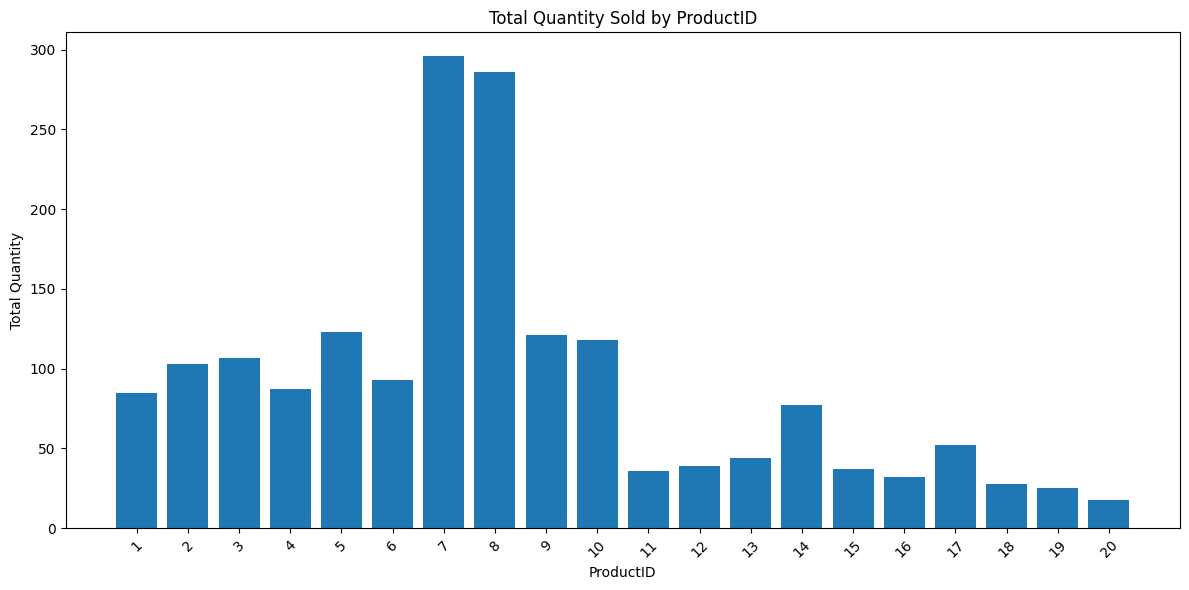

In [259]:
# Calculate the total Quantity by ProductID
total_quantity = orders_df[['Quantity', 'ProductID']].groupby(by =['ProductID']).sum()
total_quantity

# Create the barplot
plt.figure(figsize=(12, 6))
plt.bar(total_quantity.index.astype(str), total_quantity['Quantity'])

plt.title('Total Quantity Sold by ProductID')
plt.xlabel('ProductID')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 16. Create a scatterplot that plots Total Revenue and Total Cost. The scatterplot should include:
* hue that indicates the Total Net Profit of the order
* a horizontal line that indicates the mean Total Revenue for comparison
* all relevant labels to the plot and axis

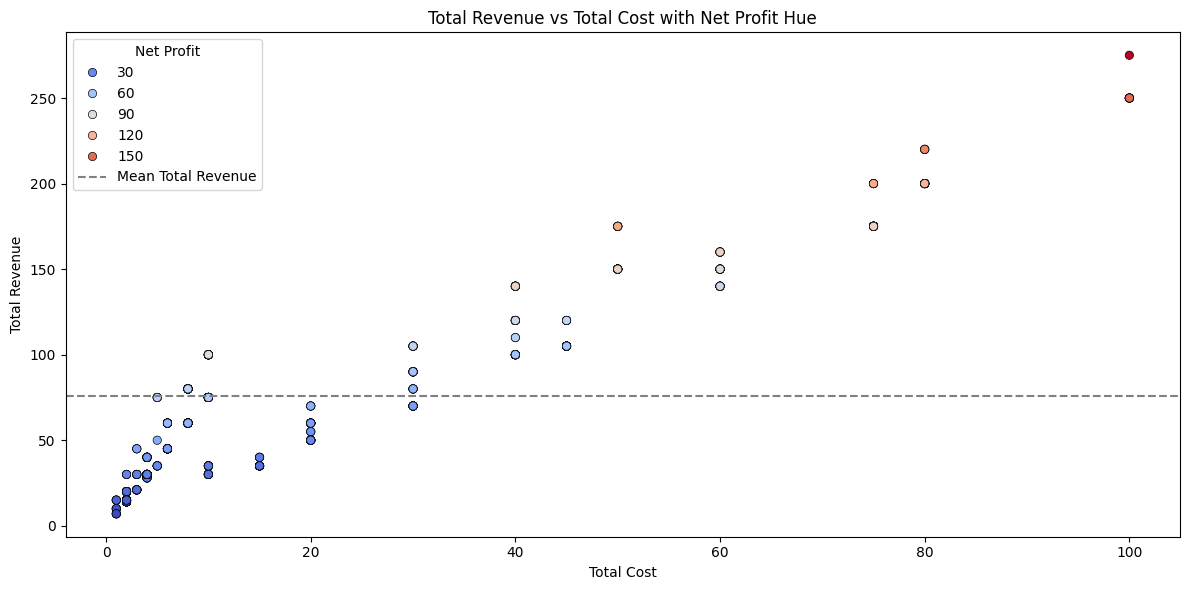

In [260]:
# Calculate mean total revenue
mean_revenue = orders_df['Total Revenue'].mean()

# Set the plot style
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=orders_df,
    x='Total Cost',
    y='Total Revenue',
    hue='Total Net Profit',
    palette='coolwarm',
    edgecolor='black'
)

# Add horizontal line for mean revenue
plt.axhline(y=mean_revenue, color='gray', linestyle='--', linewidth=1.5, label='Mean Total Revenue')

# Labels and title
plt.title('Total Revenue vs Total Cost with Net Profit Hue')
plt.xlabel('Total Cost')
plt.ylabel('Total Revenue')
plt.legend(title='Net Profit', loc='upper left')
plt.tight_layout()
plt.show()

### 17. Create a horizontal barplot that shows the average Discount Pct for each City.

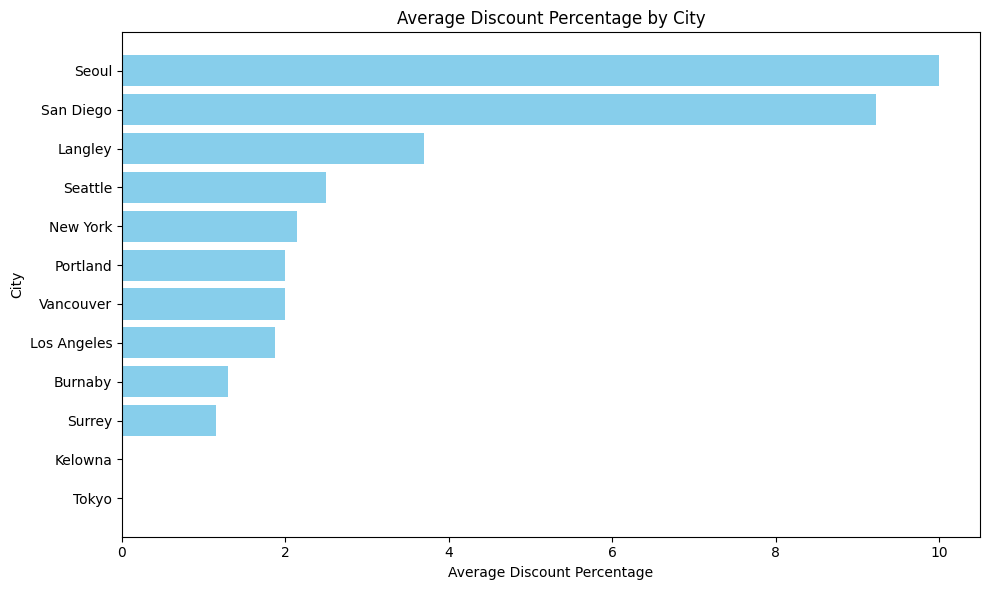

In [261]:
# Calculate the average Discount Pct by City. Sort the values by Discount Pct
avg_discount_by_city = orders_df[['City','Discount Pct']].groupby(by =['City']).mean()


avg_discount_by_city = avg_discount_by_city.sort_values('Discount Pct', ascending=False)
avg_discount_by_city

# Create the barplot
plt.figure(figsize=(10, 6))
plt.barh(avg_discount_by_city.index, avg_discount_by_city['Discount Pct'], color='skyblue')
plt.xlabel('Average Discount Percentage')
plt.ylabel('City')
plt.title('Average Discount Percentage by City')
plt.gca().invert_yaxis()  # So highest bar appears on top
plt.tight_layout()
plt.show()

### 18. Create a lineplot that shows the Total Net Profit by Date.

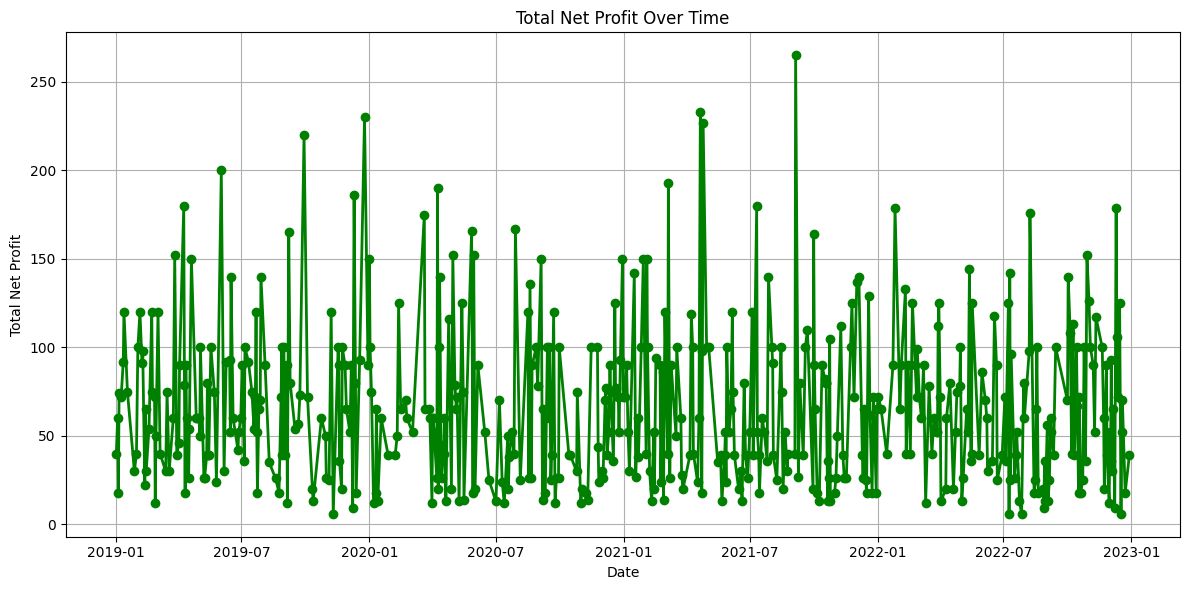

In [262]:
# Calculate Total Net Profit by Date
Total_NetProfit_byDate = orders_df[['Total Net Profit','Date']].groupby(by =['Date']).sum()

Total_NetProfit_byDate
# Set the plot area
plt.figure(figsize=(12, 6))

# Create the lineplot
plt.plot(
    Total_NetProfit_byDate.index, 
    Total_NetProfit_byDate['Total Net Profit'], 
    color='green', 
    linewidth=2, 
    marker='o'
)

# Add titles and labels
plt.title('Total Net Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Total Net Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

### 19. Create a heatmap to visualize the correlation of columns in order_df.

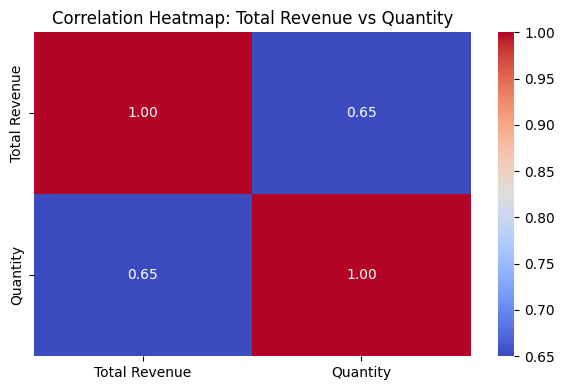

Correlation coefficient: 0.65


In [263]:
# Define the columns to include in correlation
correlation_df = orders_df[['Total Revenue', 'Quantity']]

# Calculate the correlation matrix
corr_matrix = correlation_df.corr()

# Set the plot area
plt.figure(figsize=(6, 4))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap: Total Revenue vs Quantity')

# Show the plot
plt.tight_layout()
plt.show()

correlation_value = correlation_df.corr().loc['Total Revenue', 'Quantity']
print(f"Correlation coefficient: {correlation_value:.2f}")

### 20a. Create a boxplot to identify any outliers in Total Revenue for each Type.

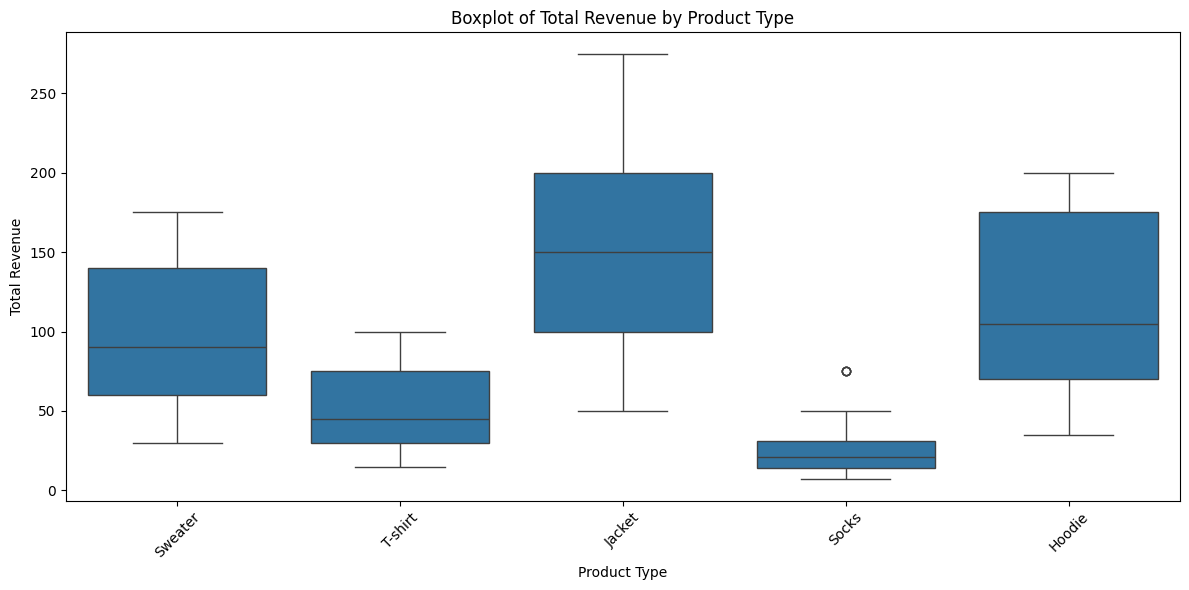

In [264]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=orders_df, x='Type', y='Total Revenue')

plt.title('Boxplot of Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 20b. Further explore the outliers identified in the visual and use the IQR rule to return the outlier rows from orders_df.

In [265]:
# Explore the descriptive statistics for the Type that contains the outliers
socks_df = orders_df[orders_df['Type'] == 'Socks']

socks_df['Total Revenue'].describe()

count    68.000000
mean     26.352941
std      16.200023
min       7.000000
25%      14.000000
50%      21.000000
75%      31.250000
max      75.000000
Name: Total Revenue, dtype: float64

In [266]:
# Calculate the IQR rule for this type to identify the outlier rows
# Calculate IQR using np.percentile
q3 = np.percentile(socks_df['Total Revenue'], 75)
q1 = np.percentile(socks_df['Total Revenue'], 25)
IQR = q3 - q1

# Define upper bound for outliers
upper_bound = q3 + 1.5 * IQR

# Return the outlier rows
socks_outliers = socks_df[socks_df['Total Revenue'] > upper_bound]
socks_outliers

,ProductID,Year,Month,Day,Quantity,OrderLine,OrderID,Name,Price,Cost,...,City,ShippingMethod,StoreID,Date,Discount Pct,Sale Price,Net Profit,Total Revenue,Total Cost,Total Net Profit
79,12,2019,7,6,5,80,80,"Socks,Black",15,1,...,Vancouver,Standard,3.0,2019-07-06,0,15.0,14.0,75.0,5,70.0
207,12,2020,7,6,5,211,211,"Socks,Black",15,1,...,Langley,Standard,2.0,2020-07-06,0,15.0,14.0,75.0,5,70.0
453,12,2022,6,5,5,499,499,"Socks,Black",15,1,...,Vancouver,Standard,3.0,2022-06-05,0,15.0,14.0,75.0,5,70.0
547,12,2022,12,19,5,599,599,"Socks,Black",15,1,...,Langley,Standard,2.0,2022-12-19,0,15.0,14.0,75.0,5,70.0
